In [1]:
from ModelOptimizer import *
from FeatureAnalyzer import *
from Cleanup import *
from ModelValidator import *
from ReportGenerator import *
import pandas as pd


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Customer-Churn-Records.csv')
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
ordinal_columns = ['Card Type']
ordinal_mappings = [['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']]

In [3]:
pipeline, data_post_process = preprocessing_pipeline(data, 'Exited', columns_to_drop=columns_to_drop, ordinal_columns=ordinal_columns, ordinal_mappings=ordinal_mappings, date_columns=None)

2025-01-12 02:42:40,320 - INFO - Rozpoczęcie tworzenia pipeline'u przetwarzania danych.
2025-01-12 02:42:40,321 - INFO - Początkowy kształt danych: (10000, 18)
2025-01-12 02:42:40,322 - INFO - Usuwane kolumny: ['RowNumber', 'CustomerId', 'Surname']
2025-01-12 02:42:40,327 - INFO - Zidentyfikowane cechy numeryczne: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
2025-01-12 02:42:40,328 - INFO - Zidentyfikowane cechy kategoryczne: ['Geography', 'Gender']
2025-01-12 02:42:40,329 - INFO - Zidentyfikowane cechy porządkowe: ['Card Type']
2025-01-12 02:42:40,330 - INFO - Zidentyfikowane cechy binarne: ['HasCrCard', 'IsActiveMember', 'Complain']
2025-01-12 02:42:40,332 - INFO - Tworzenie pipeline'u przetwarzania danych...
2025-01-12 02:42:40,374 - INFO - Liczba kolumn po przetwarzaniu: 16 (bez kolumny docelowej).
2025-01-12 02:42:40,375 - INFO - Kolumny po przetwarzaniu: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProd

In [4]:
feature_analyzer = FeatureAnalyzer(data_post_process, 'Exited', 0.2)

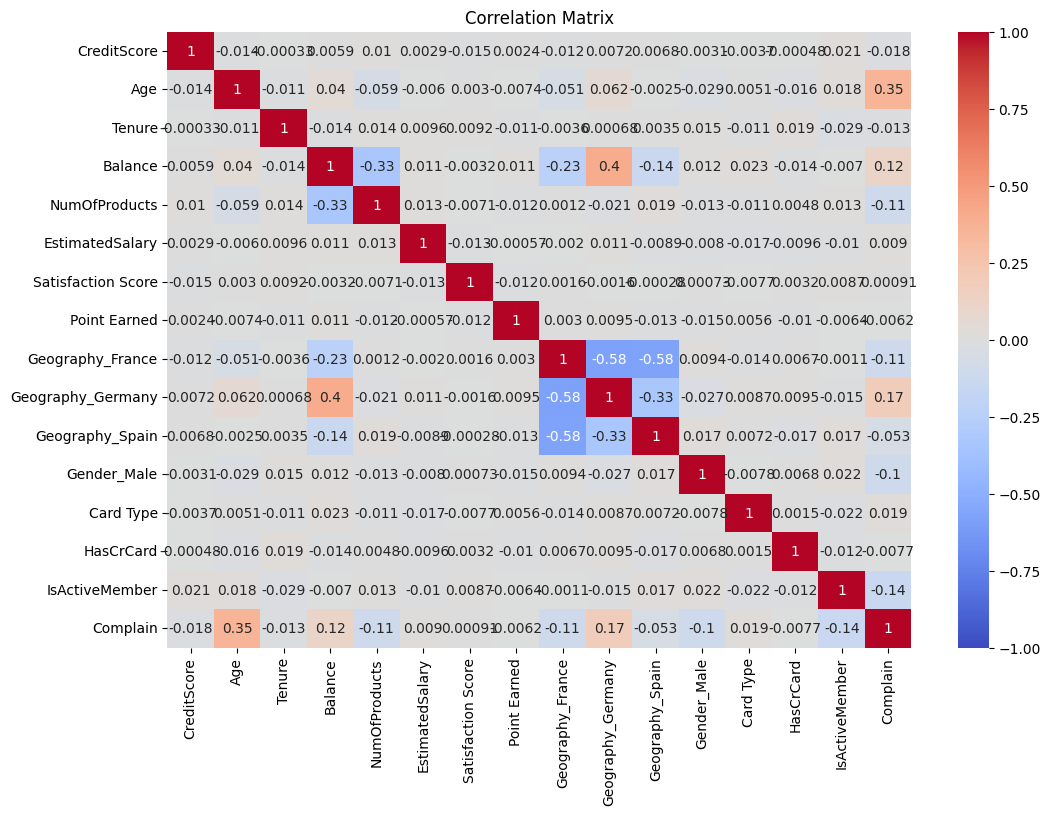

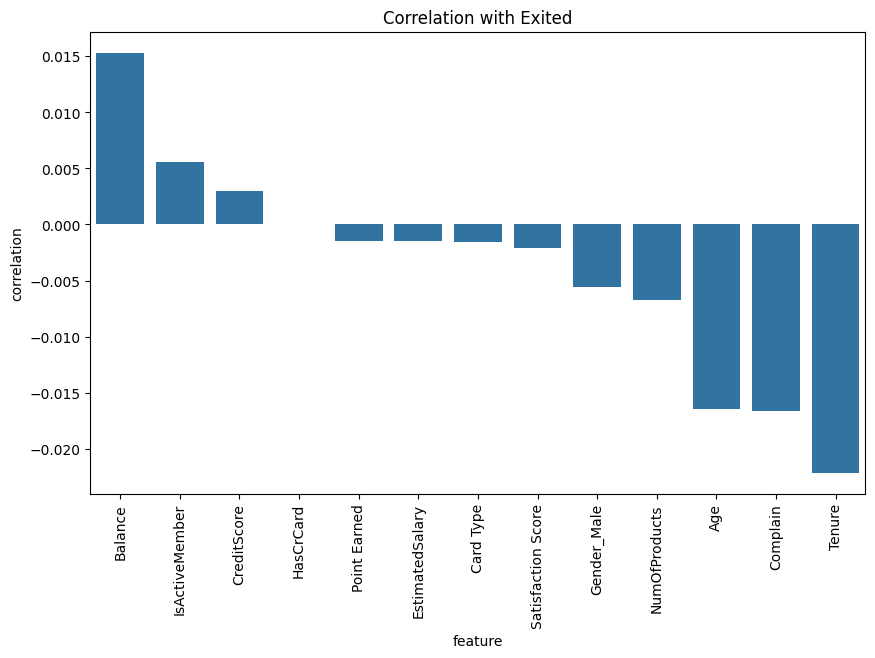

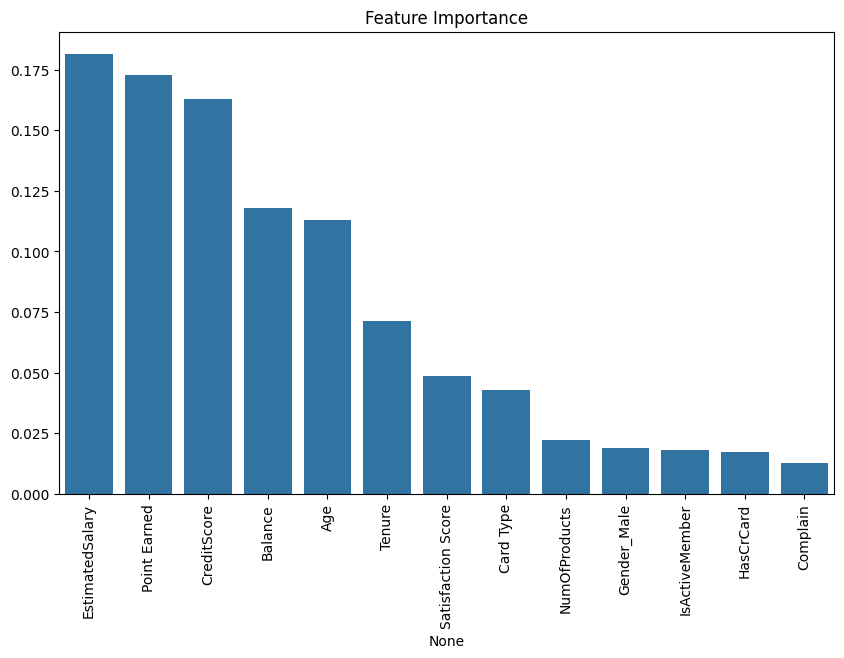

2025-01-11 15:04:44,092 - INFO - Usuwanie kolumn o wysokiej korelacji: 3
2025-01-11 15:04:44,092 - INFO - Tworzenie zmiennej golden na podstawie: EstimatedSalary
2025-01-11 15:04:44,093 - INFO - Utworzenie golden features w liczbie: 5
2025-01-11 15:04:44,093 - INFO - Końcowa liczba kolumn: 18


In [5]:
df, features = feature_analyzer.extract_best_features()

In [6]:
model_optimizer = ModelOptimizer(df, 'Exited')

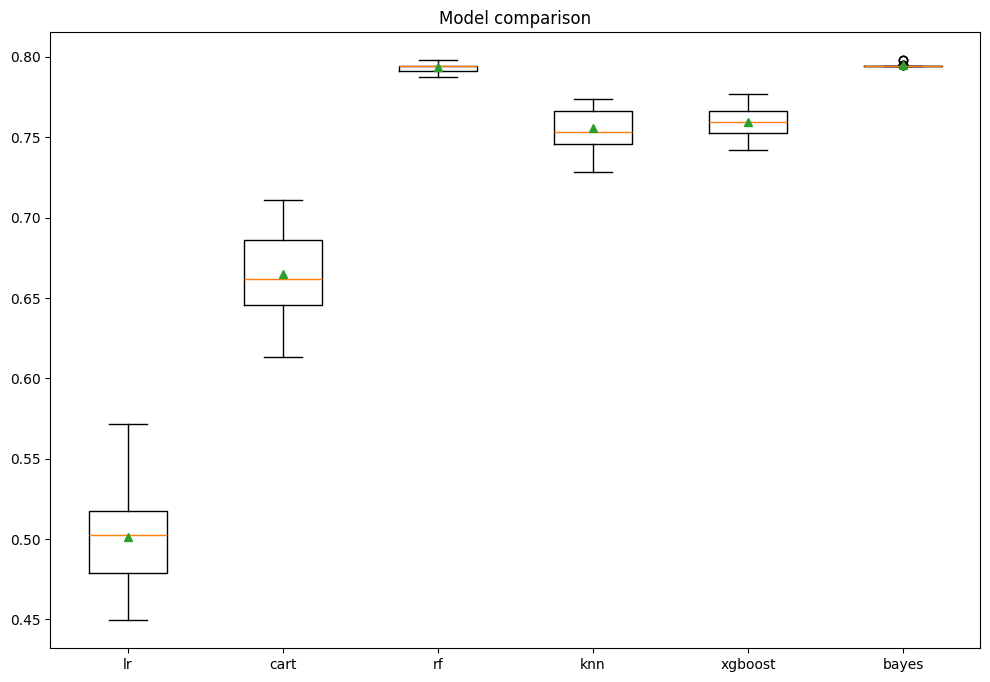

In [7]:
model_optimizer.get_models_candidates()

In [8]:
best_model = model_optimizer.optimize_model('rf')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [9]:
model_validator = ModelValidator(df, 'Exited', best_model)

In [10]:
model_validator.fit_model()

{'0': {'precision': 0.7948450017415535, 'recall': 1.0, 'f1-score': 0.8856976518532893, 'support': 2282.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 589.0}, 'accuracy': 0.7948450017415535, 'macro avg': {'precision': 0.39742250087077674, 'recall': 0.5, 'f1-score': 0.44284882592664465, 'support': 2871.0}, 'weighted avg': {'precision': 0.6317785767935301, 'recall': 0.7948450017415535, 'f1-score': 0.7039923516298175, 'support': 2871.0}}
Random (chance) Prediction: AUROC = 0.500
Model: AUROC = 0.472
Model: Gini = -0.057


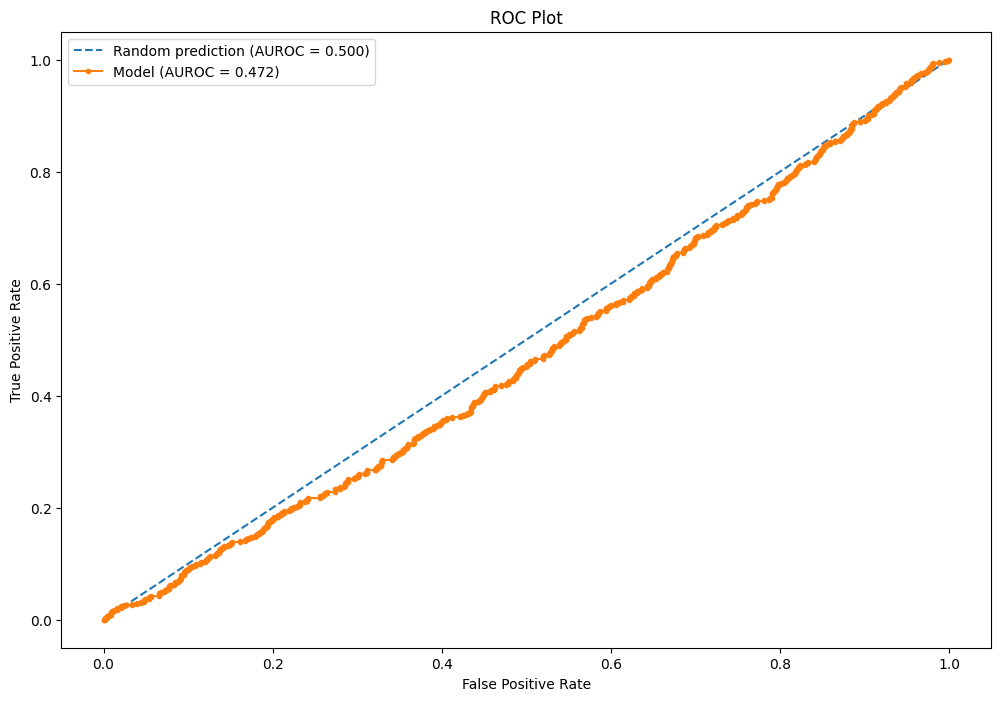

In [11]:
model_validator.get_model_summary()

2025-01-12 02:42:44,814 - INFO - Rozpoczęcie generowania raportu.
2025-01-12 02:42:44,815 - INFO - Eksploracyjna analiza danych (EDA).
2025-01-12 02:42:44,860 - INFO - Podstawowe statystyki danych:
        CreditScore           Age        Tenure       Balance  NumOfProducts   
count  9.568000e+03  9.568000e+03  9.568000e+03  9.568000e+03   9.568000e+03  \
mean   2.807119e-16  1.585502e-16 -8.762964e-17 -4.418613e-17   6.163780e-17   
std    1.000052e+00  1.000052e+00  1.000052e+00  1.000052e+00   1.000052e+00   
min   -2.785877e+00 -2.247165e+00 -1.736791e+00 -1.224651e+00  -9.386138e-01   
25%   -6.940555e-01 -6.530908e-01 -6.979088e-01 -1.224651e+00  -9.386138e-01   
50%    1.362557e-02 -8.377841e-02 -5.320364e-03  3.309503e-01  -9.386138e-01   
75%    6.900854e-01  5.993964e-01  6.872680e-01  8.199788e-01   8.804376e-01   
max    2.074226e+00  2.762783e+00  1.726151e+00  2.795319e+00   2.699489e+00   

       EstimatedSalary  Satisfaction Score  Point Earned  Geography_France   
cou

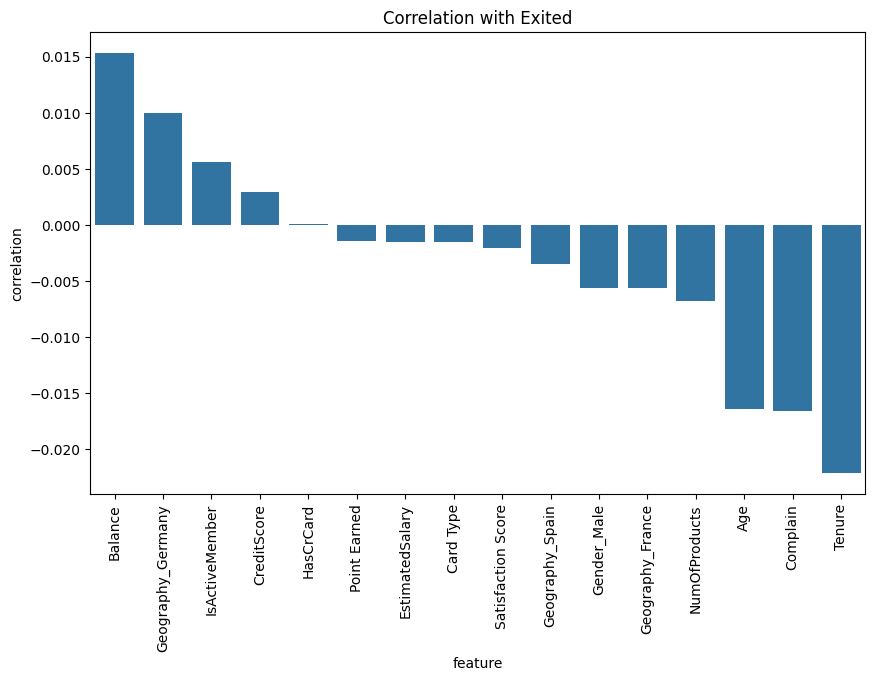

2025-01-12 02:42:49,530 - INFO - Generowanie macierzy korelacji.


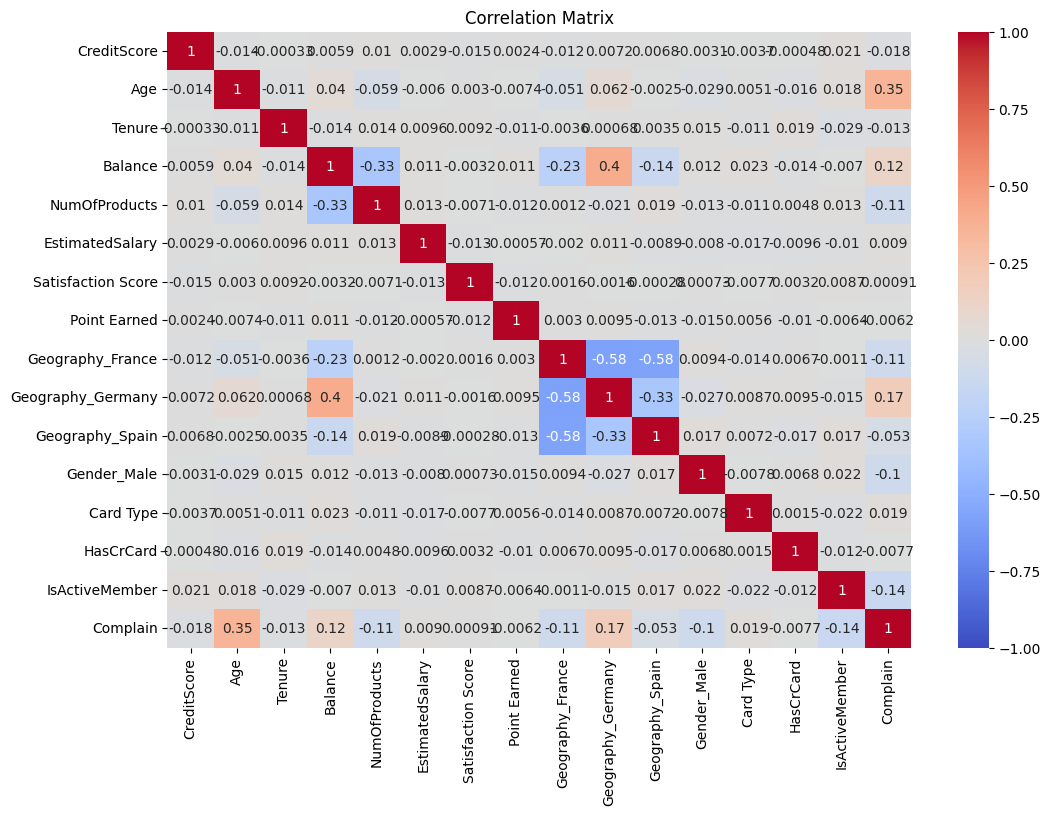

2025-01-12 02:42:51,012 - INFO - Usunięte cechy o wysokiej korelacji między sobą: ['Geography_Spain', 'Geography_France', 'Geography_Germany']
2025-01-12 02:42:51,019 - INFO - Obliczanie ważności cech.


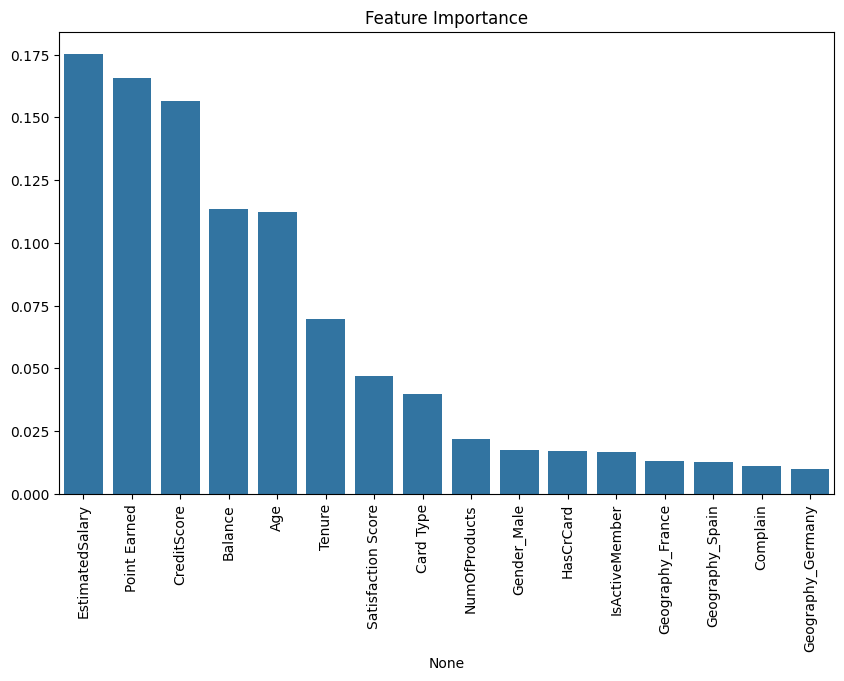

2025-01-12 02:42:56,944 - INFO - Ważności cech:
EstimatedSalary       0.175277
Point Earned          0.165815
CreditScore           0.156525
Balance               0.113536
Age                   0.112443
Tenure                0.069826
Satisfaction Score    0.046936
Card Type             0.039637
NumOfProducts         0.021914
Gender_Male           0.017318
HasCrCard             0.017051
IsActiveMember        0.016600
Geography_France      0.013244
Geography_Spain       0.012848
Complain              0.010965
Geography_Germany     0.010066
dtype: float64
2025-01-12 02:42:56,945 - INFO - Tworzenie golden features.
2025-01-12 02:42:57,179 - INFO - Utworzone golden features:
['EstimatedSalary_div_Geography_France', 'EstimatedSalary_sub_Gender_Male', 'EstimatedSalary_div_NumOfProducts', 'EstimatedSalary_div_Satisfaction Score', 'EstimatedSalary_sub_NumOfProducts']
2025-01-12 02:42:57,180 - INFO - Porównanie modeli za pomocą funkcji get_models_candidates.


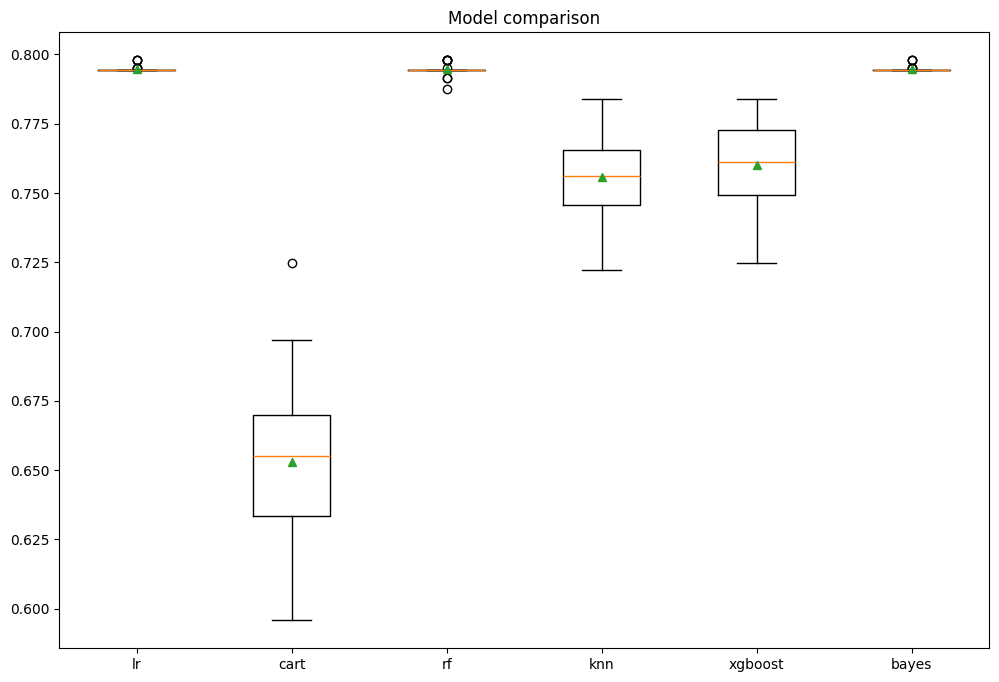

2025-01-12 02:43:05,912 - INFO - Zapisano wykres porównania modeli jako ./figures/boxplot.png.
2025-01-12 02:43:05,912 - INFO - Wybieranie najlepszego modelu na podstawie wyników walidacji.
2025-01-12 02:43:09,998 - INFO - Najlepszy model: lr z wynikiem 0.7948.
2025-01-12 02:43:09,999 - INFO - Walidacja najlepszego modelu.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


2025-01-12 02:43:13,806 - INFO - Generowanie krzywej ROC.


Random (chance) Prediction: AUROC = 0.500
Model: AUROC = 0.526
Model: Gini = 0.052


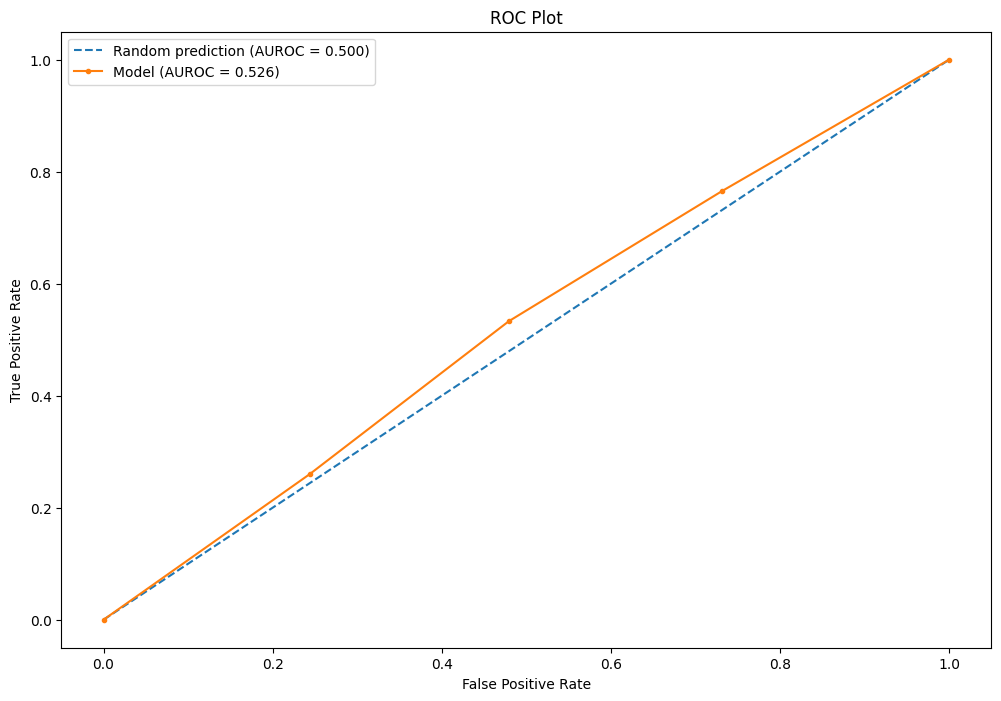

2025-01-12 02:43:14,154 - INFO - Zapisano wykres krzywej ROC jako ./figures/roc_curve.png.
2025-01-12 02:43:14,155 - INFO - Generowanie raportu klasyfikacji.
2025-01-12 02:43:14,165 - INFO - Raport klasyfikacyjny:
{'0': {'precision': 0.7948450017415535, 'recall': 1.0, 'f1-score': 0.8856976518532893, 'support': 2282.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 589.0}, 'accuracy': 0.7948450017415535, 'macro avg': {'precision': 0.39742250087077674, 'recall': 0.5, 'f1-score': 0.44284882592664465, 'support': 2871.0}, 'weighted avg': {'precision': 0.6317785767935301, 'recall': 0.7948450017415535, 'f1-score': 0.7039923516298175, 'support': 2871.0}}
2025-01-12 02:43:29,008 - INFO - Raport został zapisany jako ./figures/report_summary.pdf.


In [4]:
generate_summary_report(data_post_process, 'Exited')